In [2]:
# GFED4.1s_2023_beta.hdf5 read and visualization
import h5py

with h5py.File('GFED4.1s_2023_beta.hdf5', 'r') as f:
    def print_structure(name, obj):
        print(name)
    f.visititems(print_structure)


ancill
ancill/basis_regions
ancill/grid_cell_area
emissions
emissions/01
emissions/01/C
emissions/01/DM
emissions/01/daily_fraction
emissions/01/daily_fraction/day_1
emissions/01/daily_fraction/day_10
emissions/01/daily_fraction/day_11
emissions/01/daily_fraction/day_12
emissions/01/daily_fraction/day_13
emissions/01/daily_fraction/day_14
emissions/01/daily_fraction/day_15
emissions/01/daily_fraction/day_16
emissions/01/daily_fraction/day_17
emissions/01/daily_fraction/day_18
emissions/01/daily_fraction/day_19
emissions/01/daily_fraction/day_2
emissions/01/daily_fraction/day_20
emissions/01/daily_fraction/day_21
emissions/01/daily_fraction/day_22
emissions/01/daily_fraction/day_23
emissions/01/daily_fraction/day_24
emissions/01/daily_fraction/day_25
emissions/01/daily_fraction/day_26
emissions/01/daily_fraction/day_27
emissions/01/daily_fraction/day_28
emissions/01/daily_fraction/day_29
emissions/01/daily_fraction/day_3
emissions/01/daily_fraction/day_30
emissions/01/daily_fraction/day

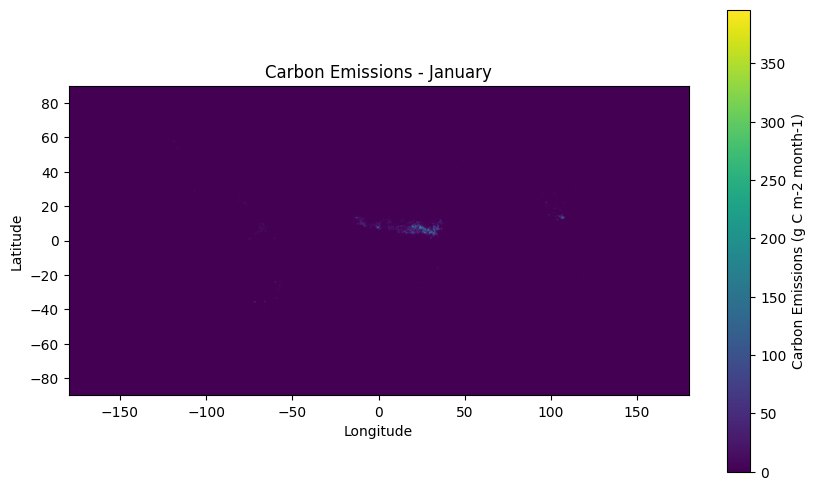

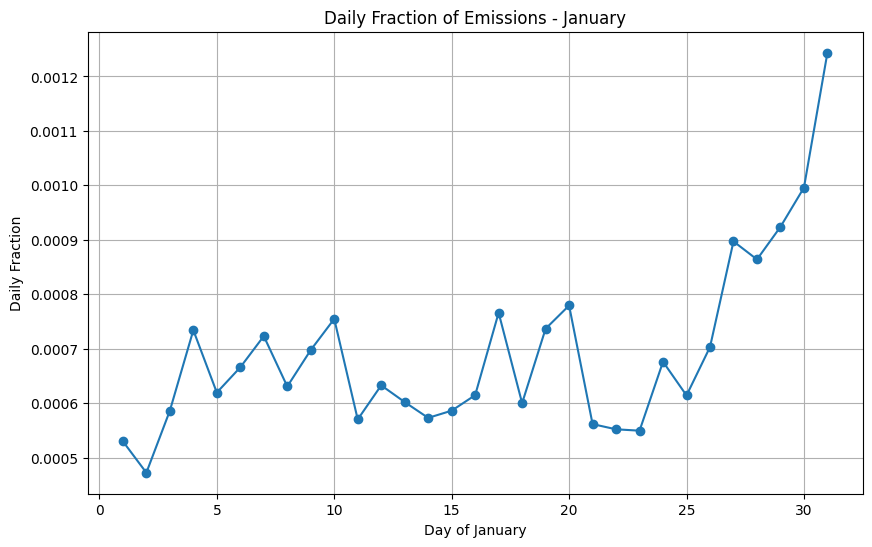

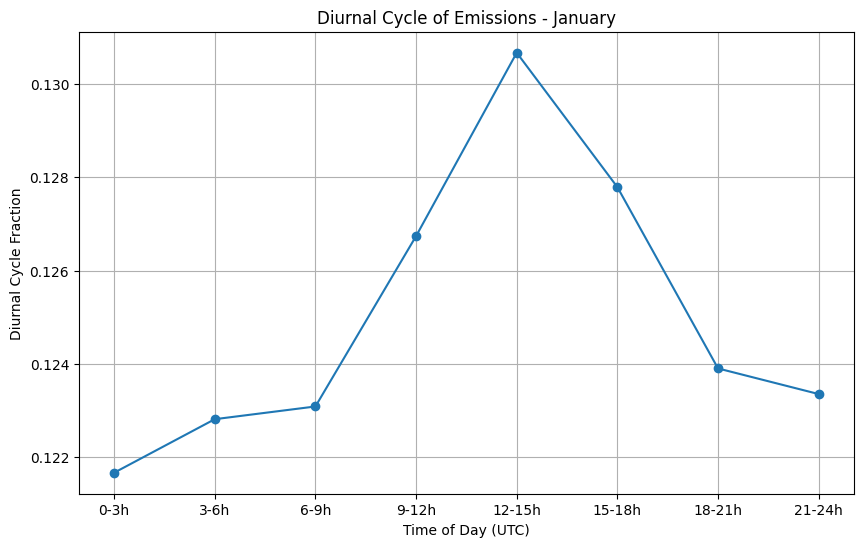

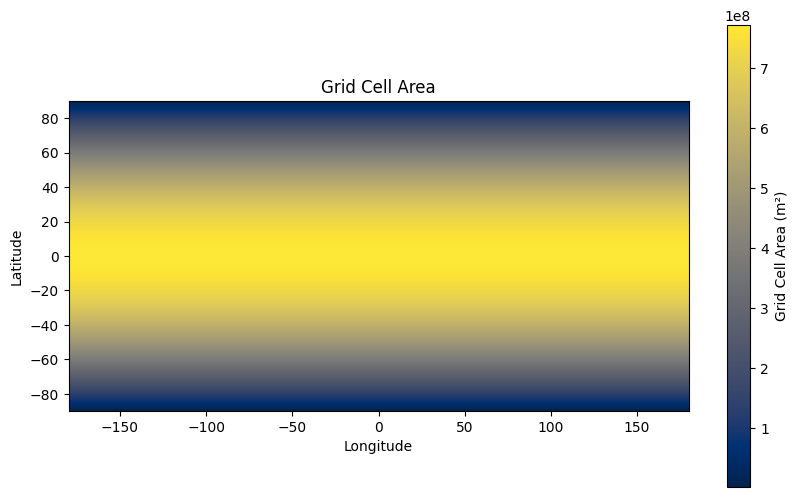

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Open the HDF5 file
file_path = 'GFED4.1s_2023_beta.hdf5'
with h5py.File(file_path, 'r') as f:
    
    # Load latitude and longitude for mapping
    lat = f['lat'][:]
    lon = f['lon'][:]
    
    # Visualize Carbon Emissions for January
    emissions_jan_C = f['emissions/01/C'][:]
    plt.figure(figsize=(10, 6))
    plt.imshow(emissions_jan_C, cmap='viridis', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
    plt.colorbar(label="Carbon Emissions (g C m-2 month-1)")
    plt.title("Carbon Emissions - January")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

    # Plot daily fraction of emissions for January across each day
    daily_fraction_jan = [f[f'emissions/01/daily_fraction/day_{day}'][:].mean() for day in range(1, 32)]
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 32), daily_fraction_jan, marker='o')
    plt.xlabel("Day of January")
    plt.ylabel("Daily Fraction")
    plt.title("Daily Fraction of Emissions - January")
    plt.grid(True)
    plt.show()
    
    # Visualize diurnal cycle for January
    diurnal_cycle_jan = [f['emissions/01/diurnal_cycle/' + time][:].mean() for time in [
        'UTC_0-3h', 'UTC_3-6h', 'UTC_6-9h', 'UTC_9-12h', 'UTC_12-15h', 'UTC_15-18h', 'UTC_18-21h', 'UTC_21-24h']]
    plt.figure(figsize=(10, 6))
    plt.plot(['0-3h', '3-6h', '6-9h', '9-12h', '12-15h', '15-18h', '18-21h', '21-24h'], diurnal_cycle_jan, marker='o')
    plt.xlabel("Time of Day (UTC)")
    plt.ylabel("Diurnal Cycle Fraction")
    plt.title("Diurnal Cycle of Emissions - January")
    plt.grid(True)
    plt.show()
    
    # Display grid cell area for the ancillary data
    grid_cell_area = f['ancill/grid_cell_area'][:]
    plt.figure(figsize=(10, 6))
    plt.imshow(grid_cell_area, cmap='cividis', extent=[lon.min(), lon.max(), lat.min(), lat.max()])
    plt.colorbar(label="Grid Cell Area (m²)")
    plt.title("Grid Cell Area")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

In [4]:
file_path = 'GFED4.1s_2023_beta.hdf5'
with h5py.File(file_path, 'r') as f:
    
    # Load latitude and longitude for mapping
    lat = f['lat'][:]
    lon = f['lon'][:]
    
    # Visualize Carbon Emissions for January
    emissions_jan_C = f['emissions/01/C'][:]

In [ ]:
import h5py
import folium
import numpy as np
from folium.plugins import HeatMap

# Load data from HDF5 file
# file_path = 'GFED4.1s_2023_beta.hdf5'
# file_path = 'GFED4.1s_2016.hdf5'
file_path = 'GFED5_Beta_daily_202012.nc'
with h5py.File(file_path, 'r') as f:
    lat = f['lat'][:]
    lon = f['lon'][:]
    emissions_jan_C = f['emissions/07/daily_fraction/day_1'][:]

# Normalize emissions data and create coordinates for heatmap
emissions_data = []
for i in range(lat.shape[0]):
    for j in range(lon.shape[0]):
        emissions_value = emissions_jan_C[i, j]
        
        # Check for valid emissions values and append to list
        if emissions_value > 0 and np.isfinite(emissions_value):
            emissions_data.append([float(lat[i, j]), float(lon[i, j]), float(emissions_value)])

# Convert to NumPy array after filtering to avoid shape issues
emissions_data = np.array(emissions_data, dtype=object)

# Normalize emissions values for better heatmap visualization
if emissions_data.size > 0:
    emissions_data[:, 2] = emissions_data[:, 2] / emissions_data[:, 2].max()  # Scale values between 0 and 1

# Calculate the mean latitude and longitude across all points for the map center
center_lat = float(np.mean(lat))
center_lon = float(np.mean(lon))

# Create a folium map centered around the mean latitude and longitude
m = folium.Map(location=[center_lat, center_lon], zoom_start=3)


HeatMap(data=emissions_data.tolist(), radius=10, blur=15, max_zoom=5).add_to(m)

# Save the map as an HTML file
m.save("carbon_emissions_jan_map.html")
m

In [ ]:
import h5py
import folium
import numpy as np
from folium.plugins import HeatMap

# Load data from HDF5 file
file_path = 'GFED4.1s_2023_beta.hdf5'
with h5py.File(file_path, 'r') as f:
    lat = f['lat'][:]
    lon = f['lon'][:]
    emissions_jan_C = f['emissions/01/C'][:]

# Initialize an empty list for emissions data
emissions_data = []

# Iterate over all latitude and longitude grid points to include all valid emissions data
for i in range(lat.shape[0]):
    for j in range(lon.shape[0]):
        emissions_value = emissions_jan_C[i, j]
        
        # Append all positive, finite emissions values without filtering by location
        if emissions_value > 0 and np.isfinite(emissions_value):
            emissions_data.append([float(lat[i, j]), float(lon[i, j]), float(emissions_value)])

# Convert the emissions data to a NumPy array after filtering to avoid shape issues
emissions_data = np.array(emissions_data, dtype=object)

# Normalize emissions values for better heatmap visualization
if emissions_data.size > 0:
    emissions_data[:, 2] = emissions_data[:, 2] / emissions_data[:, 2].max()  # Scale values between 0 and 1

# Calculate the mean latitude and longitude across all points for the map center
center_lat = float(np.mean(lat))
center_lon = float(np.mean(lon))

# Create a folium map centered around the global mean latitude and longitude
m = folium.Map(location=[center_lat, center_lon], zoom_start=2)  # Set zoom to capture the full global view

# Add heatmap layer if data is available
if emissions_data.size > 0:
    HeatMap(data=emissions_data.tolist(), radius=10, blur=15, max_zoom=5).add_to(m)

# Save the map as an HTML file
m.save("carbon_emissions_global_map.html")
m


In [7]:
import netCDF4 as nc
import folium
import numpy as np
from folium.plugins import HeatMap

# Load data from NetCDF4 file
file_path = 'GFED5_Beta_daily_202012.nc'  # Update with your actual file path
dataset = nc.Dataset(file_path)

# Extract latitude, longitude, and carbon emissions for a specific day (e.g., day 0)
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
emissions_day1_C = dataset.variables['C'][0, :, :]  # Data for the first day (index 0)

# Initialize an empty list for emissions data
emissions_data = []

# Iterate over all latitude and longitude grid points to include all valid emissions data
for i in range(lat.shape[0]):
    for j in range(lon.shape[0]):
        emissions_value = emissions_day1_C[i, j]
        
        # Append all positive, finite emissions values without filtering by location
        if emissions_value > 0 and np.isfinite(emissions_value):
            emissions_data.append([float(lat[i]), float(lon[j]), float(emissions_value)])

# Convert the emissions data to a NumPy array after filtering to avoid shape issues
emissions_data = np.array(emissions_data, dtype=object)

# Normalize emissions values for better heatmap visualization
if emissions_data.size > 0:
    emissions_data[:, 2] = emissions_data[:, 2] / emissions_data[:, 2].max()  # Scale values between 0 and 1

# Calculate the mean latitude and longitude across all points for the map center
center_lat = float(np.mean(lat))
center_lon = float(np.mean(lon))

# Create a folium map centered around the global mean latitude and longitude
m = folium.Map(location=[center_lat, center_lon], zoom_start=2)  # Set zoom to capture the full global view

# Add heatmap layer if data is available
if emissions_data.size > 0:
    HeatMap(data=emissions_data.tolist(), radius=10, blur=15, max_zoom=5).add_to(m)

# Save the map as an HTML file
m.save("carbon_emissions_global_map_gfed5_day1.html")

m

In [8]:
file_path = 'GFED5_Beta_daily_202012.nc'  # Update with your actual file path
dataset = nc.Dataset(file_path)
dataset

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: GFED5 202012
    subtitle: Global Fire Emissions Database (GFED) version 5 daily trace gas and aerosol emissions for 202012. Note this is a Beta version and prone to changes until the accompanying paper is accepted
    dimensions(sizes): lat(720), lon(1440), time(31)
    variables(dimensions): float32 lat(lat), float32 lon(lon), float64 time(time), float32 Daily fraction of emissions(time, lat, lon), float32 DM(time, lat, lon), float32 C(time, lat, lon), float32 CO2(time, lat, lon), float32 CO(time, lat, lon), float32 CH4(time, lat, lon), float32 NMOC_g(time, lat, lon), float32 H2(time, lat, lon), float32 NOx(time, lat, lon), float32 N2O(time, lat, lon), float32 PM2p5(time, lat, lon), float32 TPC(time, lat, lon), float32 OC(time, lat, lon), float32 BC(time, lat, lon), float32 SO2(time, lat, lon), float32 NH3(time, lat, lon), float32 C2H6(time, lat, lon), float32 CH3OH(time, lat, lon), float32 C2H5OH

In [13]:
dataset.variables

{'lat': <class 'netCDF4.Variable'>
 float32 lat(lat)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (720,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4.Variable'>
 float32 lon(lon)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (1440,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4.Variable'>
 float64 time(time)
     units: hours since 1800-01-01
     long_name: time
 unlimited dimensions: time
 current shape = (31,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'Daily fraction of emissions': <class 'netCDF4.Variable'>
 float32 Daily fraction of emissions(time, lat, lon)
     units: Fraction_of_emissions
     standard_name: Fraction of total monthly emissions emitted per day
 unlimited dimensions: time
 current shape = (31, 720, 1440)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 

In [14]:
dataset.variables['C']

<class 'netCDF4.Variable'>
float32 C(time, lat, lon)
    units: g C m^-2 day^-1
    standard_name: GFED5 emissions of C
unlimited dimensions: time
current shape = (31, 720, 1440)
filling on, default _FillValue of 9.969209968386869e+36 used

In [15]:
dataset

AttributeError: NetCDF: Attribute not found

In [26]:
import netCDF4 as nc
import numpy as np
import ipywidgets as widgets
from ipyleaflet import Map, Heatmap
from IPython.display import display

# Load data from NetCDF4 file
file_path = 'GFED5_Beta_daily_202012.nc'  # Update with your actual file path
dataset = nc.Dataset(file_path)

# Extract latitude, longitude, and carbon emissions
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]
emissions = dataset.variables['C'][:]  # All days data (time, lat, lon)

# Function to generate emissions data for the selected day
def generate_emissions_data(day_index):
    emissions_day = emissions[day_index, :, :]
    emissions_data = []
    
    for i in range(lat.shape[0]):
        for j in range(lon.shape[0]):
            emissions_value = emissions_day[i, j]
            if emissions_value > 0 and np.isfinite(emissions_value):
                emissions_data.append([float(lat[i]), float(lon[j]), float(emissions_value)])
    
    # Normalize emissions values for heatmap
    emissions_data = np.array(emissions_data)
    if emissions_data.size > 0:
        emissions_data[:, 2] = emissions_data[:, 2] / emissions_data[:, 2].max()
    
    return emissions_data.tolist()

# Create map
center_lat = float(np.mean(lat))
center_lon = float(np.mean(lon))
m = Map(center=(center_lat, center_lon), zoom=2)

# Initial heatmap layer for the first day
heat_data = generate_emissions_data(0)
heatmap = Heatmap(locations=heat_data, radius=10, blur=15, max=1.0)
m.add_layer(heatmap)

# Slider widget for selecting day
day_slider = widgets.IntSlider(value=0, min=0, max=emissions.shape[0] - 1, description='Day')

# Update function for the slider
def on_day_change(change):
    day_index = change['new']
    heat_data = generate_emissions_data(day_index)
    heatmap.locations = heat_data

day_slider.observe(on_day_change, names='value')

# Display the map and slider
display(day_slider)
display(m)


IntSlider(value=0, description='Day', max=30)

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…